In [25]:
import pandas as pd
import glob
import os.path
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_path = "../../data/job_board_data/"
files = glob.glob(os.path.join(data_path, "*export*.jsl"))
files

['../../data/job_board_data/deep_export_los-angeles-ca_2019-08-31.jsl',
 '../../data/job_board_data/deep_export_boston-ma_2019-09-01.jsl',
 '../../data/job_board_data/deep_export_new-york-city-ny_2019-08-12.jsl']

In [12]:
df = pd.read_json(files[0], lines=True)

In [13]:
df.columns

Index(['companyInfo', 'summary', 'isGallery', 'isCompanyTab', 'locations',
       'jobDescription', 'wrapIntoFrame', 'jobId', 'folderId', 'isCao',
       'isAggregateAndStreamlineLogin', 'isExpired', 'applyFlowType',
       'reportJobUrl', 'trackingUrl', 'globalVars', 'adobeTrackingProperties',
       'isConfidential', 'isCustomApplyOnlineJob', 'isPPCDirectClickHosted',
       'isSubscriberPanelEnabled', 'speedApplyData', 'isAuthentificated',
       'isUnrecognized', 'authenticationForSaveJobUrl',
       'authenticationForEmailFriendUrl', 'authenticationForResumeUploadUrl',
       'customApplyUrl', 'submitButtonUrl', 'jobApplyType',
       'jobIdentification', 'remoteSubscriptionUrl', 'saveUrl',
       'isSaveEnabled', 'isSavedJob', 'isEmailFriendEnabled',
       'jobApplyTypeAvailable', 'jobApplyAttribute', 'jobApplyPageType',
       'enableStandardApplyTracking', 'applyStartTrackingAttributesJson',
       'loginPageUrl', 'loginPageIFrameUrl', 'loginPageIFrameUrlAggParam',
       'log

In [14]:
df.companyInfo.map(lambda x: x['industryName'] if 'industryName' in x else "").value_counts()

                                      21642
Retail                                 5421
Other                                  3562
Travel, Transportation and Tourism     2902
Staffing/Employment Agencies           1981
                                      ...  
Real Estate, Rental and Leasing           3
Broadcasting, Music, and Film             2
Personal and Household Services           2
Agriculture/Forestry/Fishing              1
Shipping                                  1
Name: companyInfo, Length: 79, dtype: int64

In [15]:
def salary_from_string(s):
    subs = s.split('$')
    if len(subs) == 1:
        return None
    all_numbers = []
    for sub in subs[1:]:
        if(len(sub.strip())>0):
            sub = sub.replace('K', '000').strip()
            number = re.split('[ab /\-\+!]',sub)[0]
#             print(number)
            all_numbers.append(float(number.replace(',','')))
    return sum(all_numbers)/len(all_numbers)

In [17]:
df['salary']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3        {'title': 'Salary', 'rangeText': '<br />Market...
4                                                      NaN
                               ...                        
53621                                                  NaN
53622                                                  NaN
53623                                                  NaN
53624                                                  NaN
53625                                                  NaN
Name: salary, Length: 53626, dtype: object

In [38]:
## looks like about 3 percent of listings include a salary
df['salary'].isna().sum()/len(df)

0.9703874986014247

In [39]:
df['salary'].dropna().shape

(1588,)

In [31]:
df['mean_salary'] = df['salary'].map(lambda x: salary_from_string(x['rangeText']) if not pd.isna(x) else None)
## some salaries are hourly
df['mean_salary'] = df['mean_salary'].map(lambda x: x*40*50 if x<100 else x)

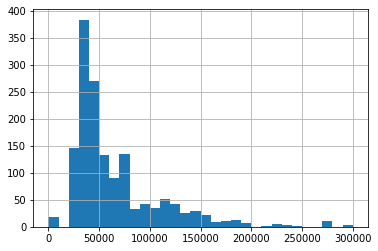

In [35]:
df['mean_salary'].clip(0,300000).hist(bins=30)